In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime


In [2]:
# Sample data
data = {'Date': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05'],
        'Value': [10, 15, 8, 12, 20]}

# Convert the 'Date' column to datetime type
df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)


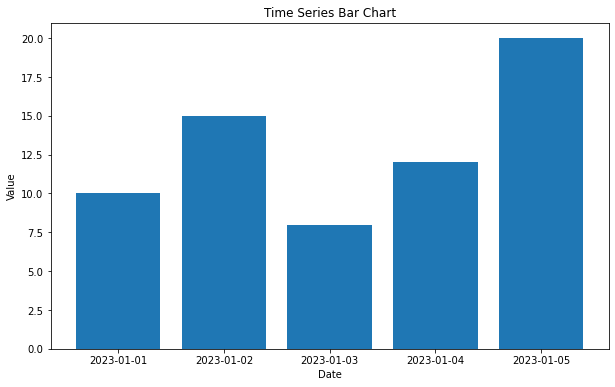

In [3]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(df.index, df['Value'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Bar Chart')
plt.show()


In [85]:
# Coingecko Coinbase Wrapped Staked ETH USD (Historical Data), 90 days

txn_vol_csv = 'cbeth-usd-max.csv'
cbeth_df = pd.read_csv(txn_vol_csv)
print(cbeth_df)

                  snapped_at        price  market_cap  total_volume
0    2022-08-25 00:00:00 UTC  1606.501536         0.0  6.531625e+06
1    2022-08-26 00:00:00 UTC  1606.501536         0.0  6.531625e+06
2    2022-08-27 00:00:00 UTC  1393.335112         0.0  1.376611e+07
3    2022-08-28 00:00:00 UTC  1414.894039         0.0  6.086034e+06
4    2022-08-29 00:00:00 UTC  1355.547887         0.0  6.574837e+06
..                       ...          ...         ...           ...
303  2023-06-24 00:00:00 UTC  1965.675539         0.0  3.238391e+06
304  2023-06-25 00:00:00 UTC  1948.688262         0.0  2.740575e+06
305  2023-06-26 00:00:00 UTC  1976.421354         0.0  2.075557e+06
306  2023-06-27 00:00:00 UTC  1932.622111         0.0  2.786998e+06
307  2023-06-28 00:00:00 UTC  1965.780683         0.0  3.156557e+06

[308 rows x 4 columns]


In [86]:
cbeth_df.columns

Index(['snapped_at', 'price', 'market_cap', 'total_volume'], dtype='object')

In [89]:
# change total_volume to integer instead of scientific notation
cbeth_df['total_volume'] = cbeth_df['total_volume'].astype(int)

print(cbeth_df)

                  snapped_at        price  market_cap  total_volume
0    2022-08-25 00:00:00 UTC  1606.501536         0.0       6531624
1    2022-08-26 00:00:00 UTC  1606.501536         0.0       6531624
2    2022-08-27 00:00:00 UTC  1393.335112         0.0      13766112
3    2022-08-28 00:00:00 UTC  1414.894039         0.0       6086033
4    2022-08-29 00:00:00 UTC  1355.547887         0.0       6574836
..                       ...          ...         ...           ...
303  2023-06-24 00:00:00 UTC  1965.675539         0.0       3238391
304  2023-06-25 00:00:00 UTC  1948.688262         0.0       2740575
305  2023-06-26 00:00:00 UTC  1976.421354         0.0       2075556
306  2023-06-27 00:00:00 UTC  1932.622111         0.0       2786998
307  2023-06-28 00:00:00 UTC  1965.780683         0.0       3156557

[308 rows x 4 columns]


In [90]:
# Change column name
new_column = 'date'
cbeth_df.rename(columns={'snapped_at': new_column}, inplace=True)
print(cbeth_df)



# Filter for the last 30 days
filter30_cbeth_df = cbeth_df[-30:]
print(filter30_cbeth_df)

                        date        price  market_cap  total_volume
0    2022-08-25 00:00:00 UTC  1606.501536         0.0       6531624
1    2022-08-26 00:00:00 UTC  1606.501536         0.0       6531624
2    2022-08-27 00:00:00 UTC  1393.335112         0.0      13766112
3    2022-08-28 00:00:00 UTC  1414.894039         0.0       6086033
4    2022-08-29 00:00:00 UTC  1355.547887         0.0       6574836
..                       ...          ...         ...           ...
303  2023-06-24 00:00:00 UTC  1965.675539         0.0       3238391
304  2023-06-25 00:00:00 UTC  1948.688262         0.0       2740575
305  2023-06-26 00:00:00 UTC  1976.421354         0.0       2075556
306  2023-06-27 00:00:00 UTC  1932.622111         0.0       2786998
307  2023-06-28 00:00:00 UTC  1965.780683         0.0       3156557

[308 rows x 4 columns]
                        date        price  market_cap  total_volume
278  2023-05-30 00:00:00 UTC  1964.617443         0.0      12824879
279  2023-05-31 00:00:00

In [91]:
from datetime import datetime

# Define the conversion function
# convert from string
def format_date(date):
    datetime_obj = datetime.strptime(date, '%Y-%m-%d %H:%M:%S %Z')
    formatted_date = datetime_obj.strftime('%Y-%m-%d')
    return formatted_date

# Apply conversion function to the date column
filter30_cbeth_df['date'] = filter30_cbeth_df['date'].apply(lambda x: format_date(str(x)))

# Convert total_volume column to float
filter30_cbeth_df['total_volume'] = filter30_cbeth_df['total_volume'].astype(float)

# print
print(filter30_cbeth_df)

           date        price  market_cap  total_volume
278  2023-05-30  1964.617443         0.0    12824879.0
279  2023-05-31  1973.776739         0.0    11926553.0
280  2023-06-01  1944.448743         0.0    43835053.0
281  2023-06-02  1931.774780         0.0     9574382.0
282  2023-06-03  1979.473229         0.0    11771150.0
283  2023-06-04  1962.742570         0.0     3054692.0
284  2023-06-05  1961.387266         0.0     2311597.0
285  2023-06-06  1884.174653         0.0     9775032.0
286  2023-06-07  1952.936529         0.0    10174107.0
287  2023-06-08  1900.240371         0.0     6070704.0
288  2023-06-09  1915.318814         0.0    13845554.0
289  2023-06-10  1908.357070         0.0     9771125.0
290  2023-06-11  1818.188513         0.0    25747366.0
291  2023-06-12  1816.629391         0.0     4069845.0
292  2023-06-13  1809.183140         0.0    10591555.0
293  2023-06-14  1802.248790         0.0     8066670.0
294  2023-06-15  1715.381385         0.0    13511430.0
295  2023-

/var/folders/v0/71tqdwzx1_11vzpcg1y_4mj80000gn/T/ipykernel_24607/2425882917.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter30_cbeth_df['date'] = filter30_cbeth_df['date'].apply(lambda x: format_date(str(x)))
/var/folders/v0/71tqdwzx1_11vzpcg1y_4mj80000gn/T/ipykernel_24607/2425882917.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter30_cbeth_df['total_volume'] = filter30_cbeth_df['total_volume'].astype(float)


In [93]:
print(filter30_cbeth_df)

           date        price  market_cap  total_volume
278  2023-05-30  1964.617443         0.0    12824879.0
279  2023-05-31  1973.776739         0.0    11926553.0
280  2023-06-01  1944.448743         0.0    43835053.0
281  2023-06-02  1931.774780         0.0     9574382.0
282  2023-06-03  1979.473229         0.0    11771150.0
283  2023-06-04  1962.742570         0.0     3054692.0
284  2023-06-05  1961.387266         0.0     2311597.0
285  2023-06-06  1884.174653         0.0     9775032.0
286  2023-06-07  1952.936529         0.0    10174107.0
287  2023-06-08  1900.240371         0.0     6070704.0
288  2023-06-09  1915.318814         0.0    13845554.0
289  2023-06-10  1908.357070         0.0     9771125.0
290  2023-06-11  1818.188513         0.0    25747366.0
291  2023-06-12  1816.629391         0.0     4069845.0
292  2023-06-13  1809.183140         0.0    10591555.0
293  2023-06-14  1802.248790         0.0     8066670.0
294  2023-06-15  1715.381385         0.0    13511430.0
295  2023-

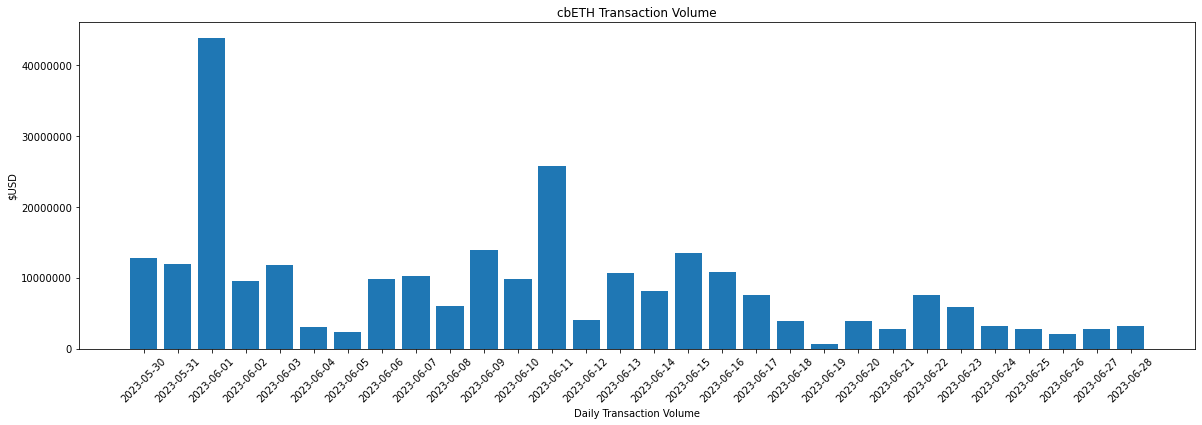

In [94]:
# Plotting the bar chart
plt.figure(figsize=(20, 6))
plt.bar(filter30_cbeth_df['date'], filter30_cbeth_df['total_volume'])
plt.xticks(rotation=45)
# Disable scientific noation on y-axis
plt.ticklabel_format(style='plain', axis='y')
# adjust tick frequency
#plt.gca().xaxis.set_major_locator(plt.MaxNLocator(20))  # Set the number of ticks you want to display
plt.xlabel('Daily Transaction Volume')
plt.ylabel('$USD')
plt.title('cbETH Transaction Volume')
plt.show()

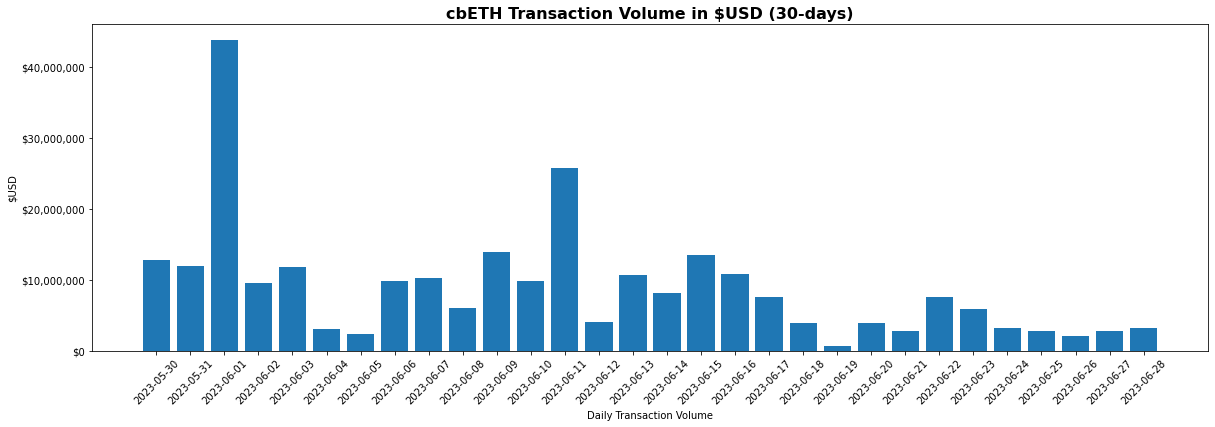

In [97]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Define the formatter function 
def currency_formatter(x, pos):
    """Formats the tick label as $USD format with commas"""
    return f'${x:,.0f}'

# create the formatter
formatter = ticker.FuncFormatter(currency_formatter)

# Apply the formatter to the y-axis


# Plotting the bar chart
plt.figure(figsize=(20, 6))
plt.bar(filter30_cbeth_df['date'], filter30_cbeth_df['total_volume'])
plt.xticks(rotation=45)
# Disable scientific noation on y-axis
plt.ticklabel_format(style='plain', axis='y')
# Apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(formatter)

# adjust tick frequency
#plt.gca().xaxis.set_major_locator(plt.MaxNLocator(20))  # Set the number of ticks you want to display
plt.xlabel('Daily Transaction Volume')
plt.ylabel('$USD')
plt.title('cbETH Transaction Volume in $USD (30-days)', fontweight='bold', fontsize=16)
plt.show()

In [101]:
print(filter30_cbeth_df)

print(filter30_cbeth_df['total_volume'].max())
print(filter30_cbeth_df['total_volume'].min())
print(filter30_cbeth_df['total_volume'].mean())

           date        price  market_cap  total_volume
278  2023-05-30  1964.617443         0.0    12824879.0
279  2023-05-31  1973.776739         0.0    11926553.0
280  2023-06-01  1944.448743         0.0    43835053.0
281  2023-06-02  1931.774780         0.0     9574382.0
282  2023-06-03  1979.473229         0.0    11771150.0
283  2023-06-04  1962.742570         0.0     3054692.0
284  2023-06-05  1961.387266         0.0     2311597.0
285  2023-06-06  1884.174653         0.0     9775032.0
286  2023-06-07  1952.936529         0.0    10174107.0
287  2023-06-08  1900.240371         0.0     6070704.0
288  2023-06-09  1915.318814         0.0    13845554.0
289  2023-06-10  1908.357070         0.0     9771125.0
290  2023-06-11  1818.188513         0.0    25747366.0
291  2023-06-12  1816.629391         0.0     4069845.0
292  2023-06-13  1809.183140         0.0    10591555.0
293  2023-06-14  1802.248790         0.0     8066670.0
294  2023-06-15  1715.381385         0.0    13511430.0
295  2023-